<a href="https://colab.research.google.com/github/lovgon/stepik-fast-start_to_AI/blob/main/1_3_ROC_AUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Курс "Быстрый старт в исусственный интеллект"**

**Неделя 1. Машинное обучение**

**1.3. ROC-AUC**

В этом ноутбуке мы научимся строить ROC-кривую на примере задачи предсказания отклика на маркетинговую кампанию

# Постановка задачи

# Сбор данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from google.colab import drive
drive.mount('/content/gdrive/')

data = pd.read_csv('/content/gdrive/My Drive/bank-additional-full.csv', sep=';', quotechar='"')
# Если строчка не выполняется, ноутбук нужно сохранить на компьютере и данные положить в ту же папку

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [17]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Выделение целевой аудитории

In [20]:
data.loc[data['y'] == 'yes', 'y'] = 1
data.loc[data['y'] == 'no', 'y'] = 0

data['y'] = data['y'].astype(int)

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [21]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

# Предварительный анализ признаков

In [22]:
data = data.drop(columns=['duration'])

# One-hot кодирование

In [23]:
# Разделим признаки на числовые и категориальные с помощью функции ``select_dtypes``
data_categorical = data.select_dtypes(include=['object'])
data_numeric = data.select_dtypes(exclude=['object'])

# one-hot кодирование
data_one_hot = pd.get_dummies(data_categorical)

In [24]:
# формируем общую матрицу объекты-признаки и выделяем целевую переменную
X = pd.concat([data_numeric, data_one_hot], axis='columns').drop(columns=['y'])
y = data['y']

In [25]:
X.shape

(41188, 62)

# Составление плана обучения и тестирования, train и test

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Обработка числовых признаков, нормаровка

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение алгоритма

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train)

In [32]:
y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

# Построение ROC-кривой и измерение ROC-AUC score

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

Train roc-auc:  0.7946666683766628
Test roc-auc:   0.7932396959691186


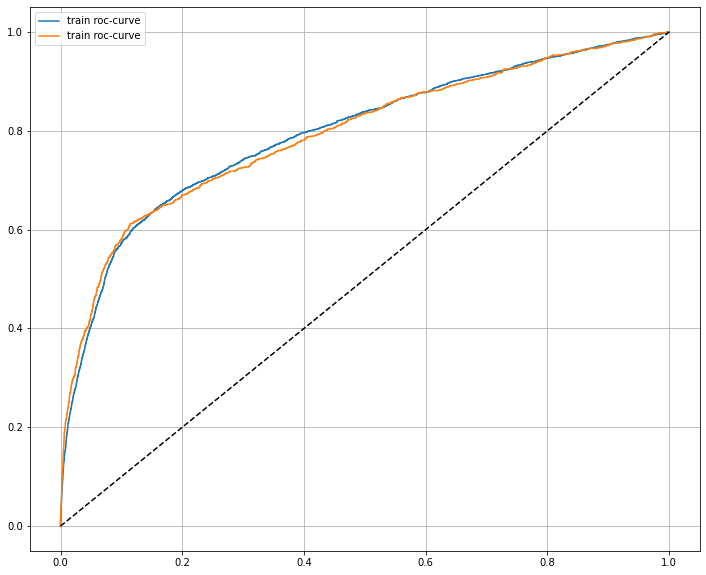

In [43]:
plt.figure(figsize=(12, 10))

print(f'Train roc-auc:  {roc_auc_score(y_train, y_train_proba)}')
print(f'Test roc-auc:   {roc_auc_score(y_test, y_test_proba)}')

plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='train roc-curve')

plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.grid(True)
plt.legend()
plt.show()